<a href="https://colab.research.google.com/github/afrozar0/afro0/blob/master/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving de.csv to de.csv


In [0]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [49]:
# Read  data
recipes = pd.read_csv('de.csv')
recipes

,no.,Age,Gender,BPS,BPD,HR,OS,BT,RR,Prediction
0,1,15,Male,134,90,105,96,94.8,21,YES
1,2,15,Male,120,85,95,98,97.6,19,YES
2,3,15,Male,125,65,100,95,96.8,22,YES
3,4,15,Male,105,87,90,101,95.5,20,NO
4,5,15,Male,100,80,105,90,97.1,22,NO
5,6,15,Male,102,90,110,97,99.2,17,NO
6,7,15,Male,110,90,95,95,100.3,20,NO
7,8,15,Male,100,70,100,97,101.5,21,YES
8,9,15,Male,95,75,87,95,97.6,23,NO
9,10,15,Male,105,80,80,90,96.5,21,NO


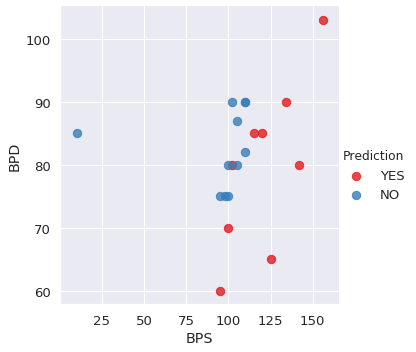

In [50]:
# Plot two ingredients
sns.lmplot('BPS', 'BPD', data=recipes,hue='Prediction',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [52]:
# Specify inputs for the model
# ingredients = recipes[['no.','Age','Gender', 'BPS', 'BPD', 'HR', 'OS', 'BT','RR']].as_matrix()

ingredients = recipes[['BPS','BPD']].as_matrix()
type_label = np.where(recipes['Prediction']=='YES', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


['Age', 'Gender', 'BPS', 'BPD', 'HR', 'OS', 'BT', 'RR', 'Prediction']

In [53]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

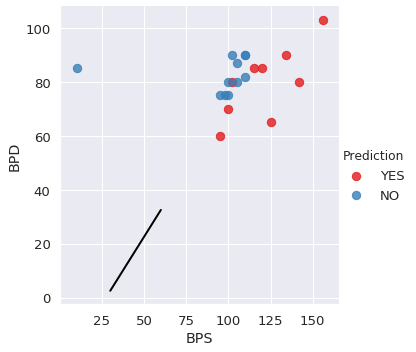

In [61]:
# Plot the hyperplane
sns.lmplot('BPS', 'BPD', data=recipes, hue='Prediction',fit_reg=False,palette='Set1', scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');